<a href="https://colab.research.google.com/github/JulioCesarMS/Finance/blob/main/Portfolio_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis**

In [2]:
install.packages('Sim.DiffProc')
install.packages('abind')
install.packages('pracma')
install.packages('ggrepel')
install.packages('readr')
install.packages('ggridges')
install.packages('use_course_details')
#devtools::install_github("delabj/ggCyberPunk")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in download.file(url, destfile, method, mode = "wb", ...):
“URL 'https://cran.rstudio.com/src/contrib/pracma_2.3.8.tar.gz': status was 'SSL connect error'”


Error in download.file(url, destfile, method, mode = "wb", ...) : 
  cannot open URL 'https://cran.rstudio.com/src/contrib/pracma_2.3.8.tar.gz'


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
“download of package ‘pracma’ failed”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘use_course_details’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [4]:
library('ggplot2')
library('dplyr')
library('tidyr')
library('Sim.DiffProc')
library('abind')
library('pracma')
library('ggrepel')
library('readr')
library('usethis')
library('ggridges')
#library('ggCyberPunk')
options(warn=-1)

In [5]:
getReturns<-function(x, simple=TRUE){
  names<-c(names(x)[-1])
  time<-x[-1,1]
  x<-as.matrix(x[,-1],ncol=ncol(x[,-1]),byrow=FALSE) 
  B<- matrix(ncol=ncol(x),nrow=nrow(x)-1)
  for(i in 1:ncol(x)){
    if(simple){
      B[,i] <- (exp(diff(log(x[,i]),lag=1)) - 1)
    }else{
      B[,i]<-diff(log(x[,i]),lag=1)
    }
        
  }
  B<-data.frame(B)     
  colnames(B)<-names
  C<-data.frame(Date=time,B)
  return(C)
}

In [8]:
# download from github
download.file(url ='https://github.com/JulioCesarMS/Finance-Readme.md/blob/main/datasets/base_full.zip', destfile = "base_full.zip")
unzip(zipfile = "base_full.zip")

base <- read.csv(list.files()[1]) %>% mutate('Date'=as.Date(Date, format="%Y-%m-%d"))
head(base)

,Date,Stock,Price,Index
,<date>,<chr>,<dbl>,<chr>
1,2000-01-03,WMT,66.812500,down
2,2000-01-03,MRK,64.527672,down
3,2000-01-03,INTC,43.500000,down
4,2000-01-03,MSFT,58.281250,down
5,2000-01-03,MMM,47.187500,down
6,2000-01-03,AAPL,0.999442,down


In [9]:
indices <- unique(base$Index)
base_ret <- base %>% 
  filter(Index==indices[1]) %>% 
  pivot_wider(names_from='Stock', values_from='Price') %>% 
  select(-Index) %>% 
  getReturns() %>% 
  pivot_longer(!Date, names_to='Stock', values_to='Returns') %>% 
  mutate('Index'= indices[1])

for(i in 2:length(indices)){
  base_i <- base %>% 
    filter(Index==indices[i]) %>% 
    pivot_wider(names_from='Stock', values_from='Price')  %>% 
    select(-Index) %>% 
    getReturns() %>% 
    pivot_longer(!Date, names_to='Stock', values_to='Returns') %>% 
    mutate('Index'= indices[i])
  base_ret <- rbind(base_ret, base_i)
}

In [7]:
head(base_ret)

Date,Stock,Returns,Index
<date>,<chr>,<dbl>,<chr>
2000-01-04,WMT,-0.03741815,down
2000-01-04,MRK,-0.03512013,down
2000-01-04,INTC,-0.04669540,down
2000-01-04,MSFT,-0.03378016,down
2000-01-04,MMM,-0.03973510,down
2000-01-04,AAPL,-0.08431001,down


In [14]:
length(base_ret%>%filter(Index=='down', Stock=='WMT')%>%select(Returns)%>%pull())

[1] 5283

## **Distribución de los rendimientos**

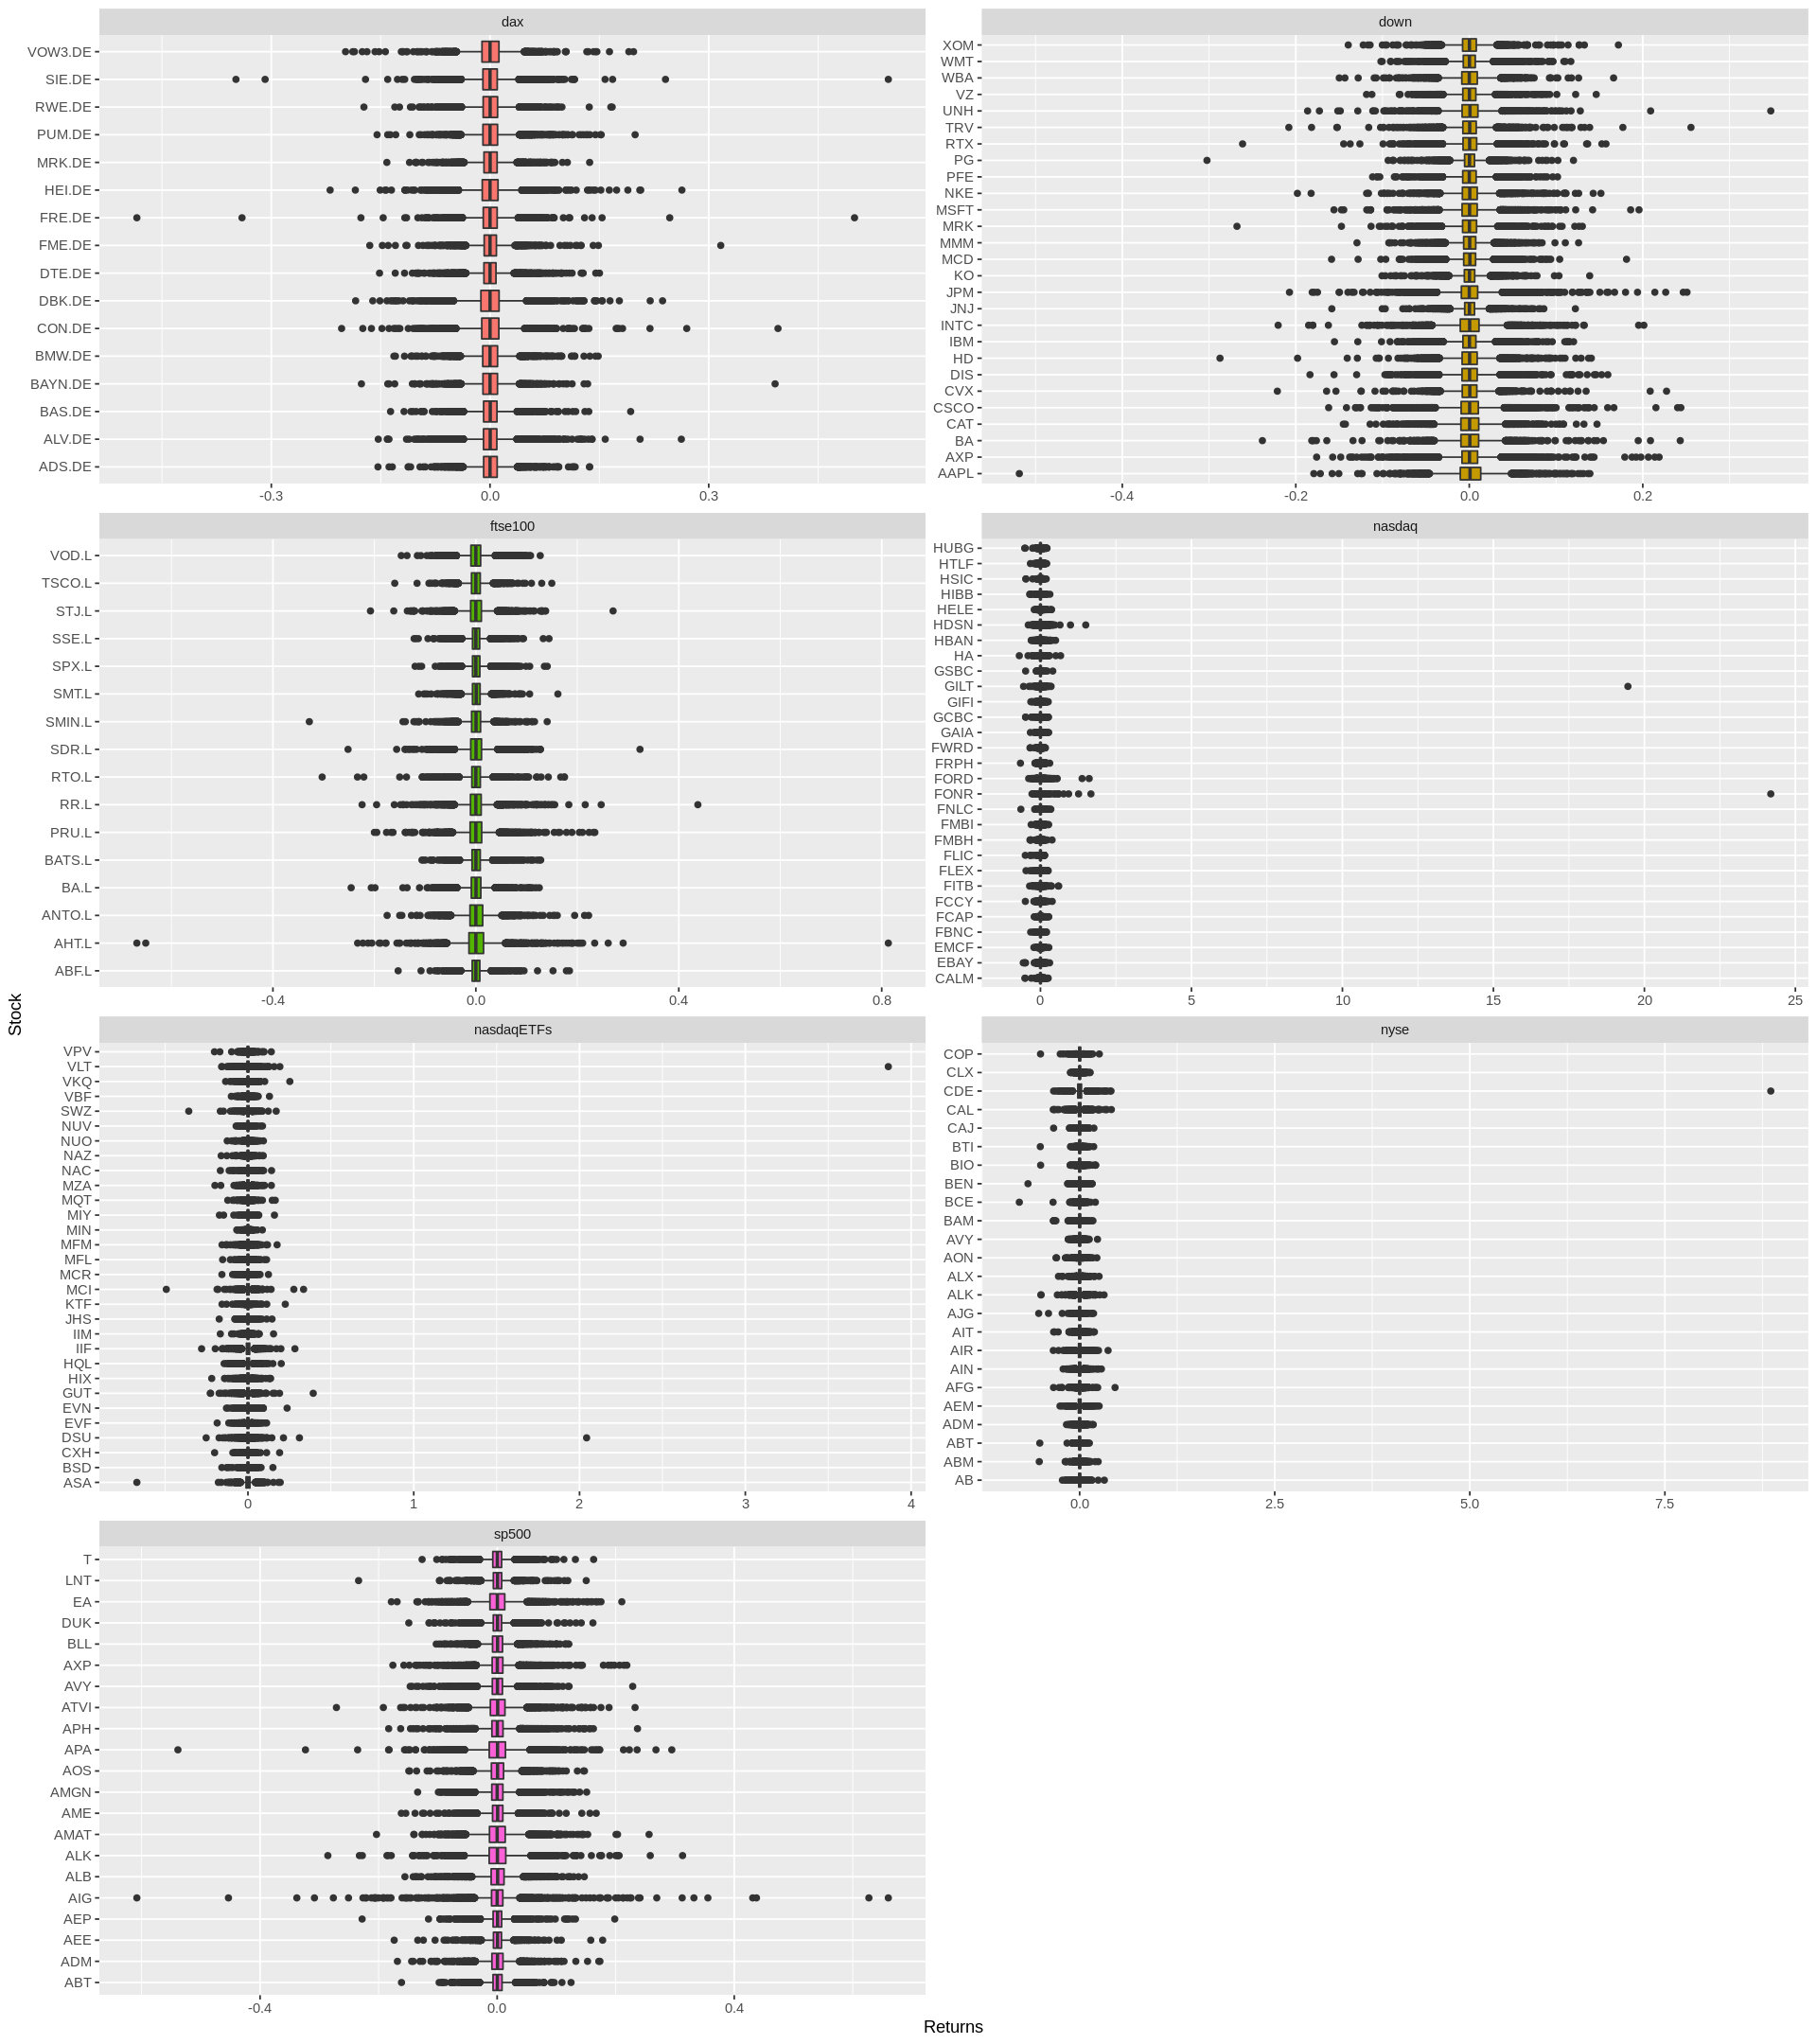

In [11]:
options(repr.plot.width=16, repr.plot.height=18)
p1 <- ggplot(base_ret, aes(x=Stock, y=Returns, fill=Index) ) +
  geom_boxplot() +
  coord_flip()+ 
  facet_wrap(vars(Index), ncol=2, scale="free") +
  theme(legend.position = "None")

p1

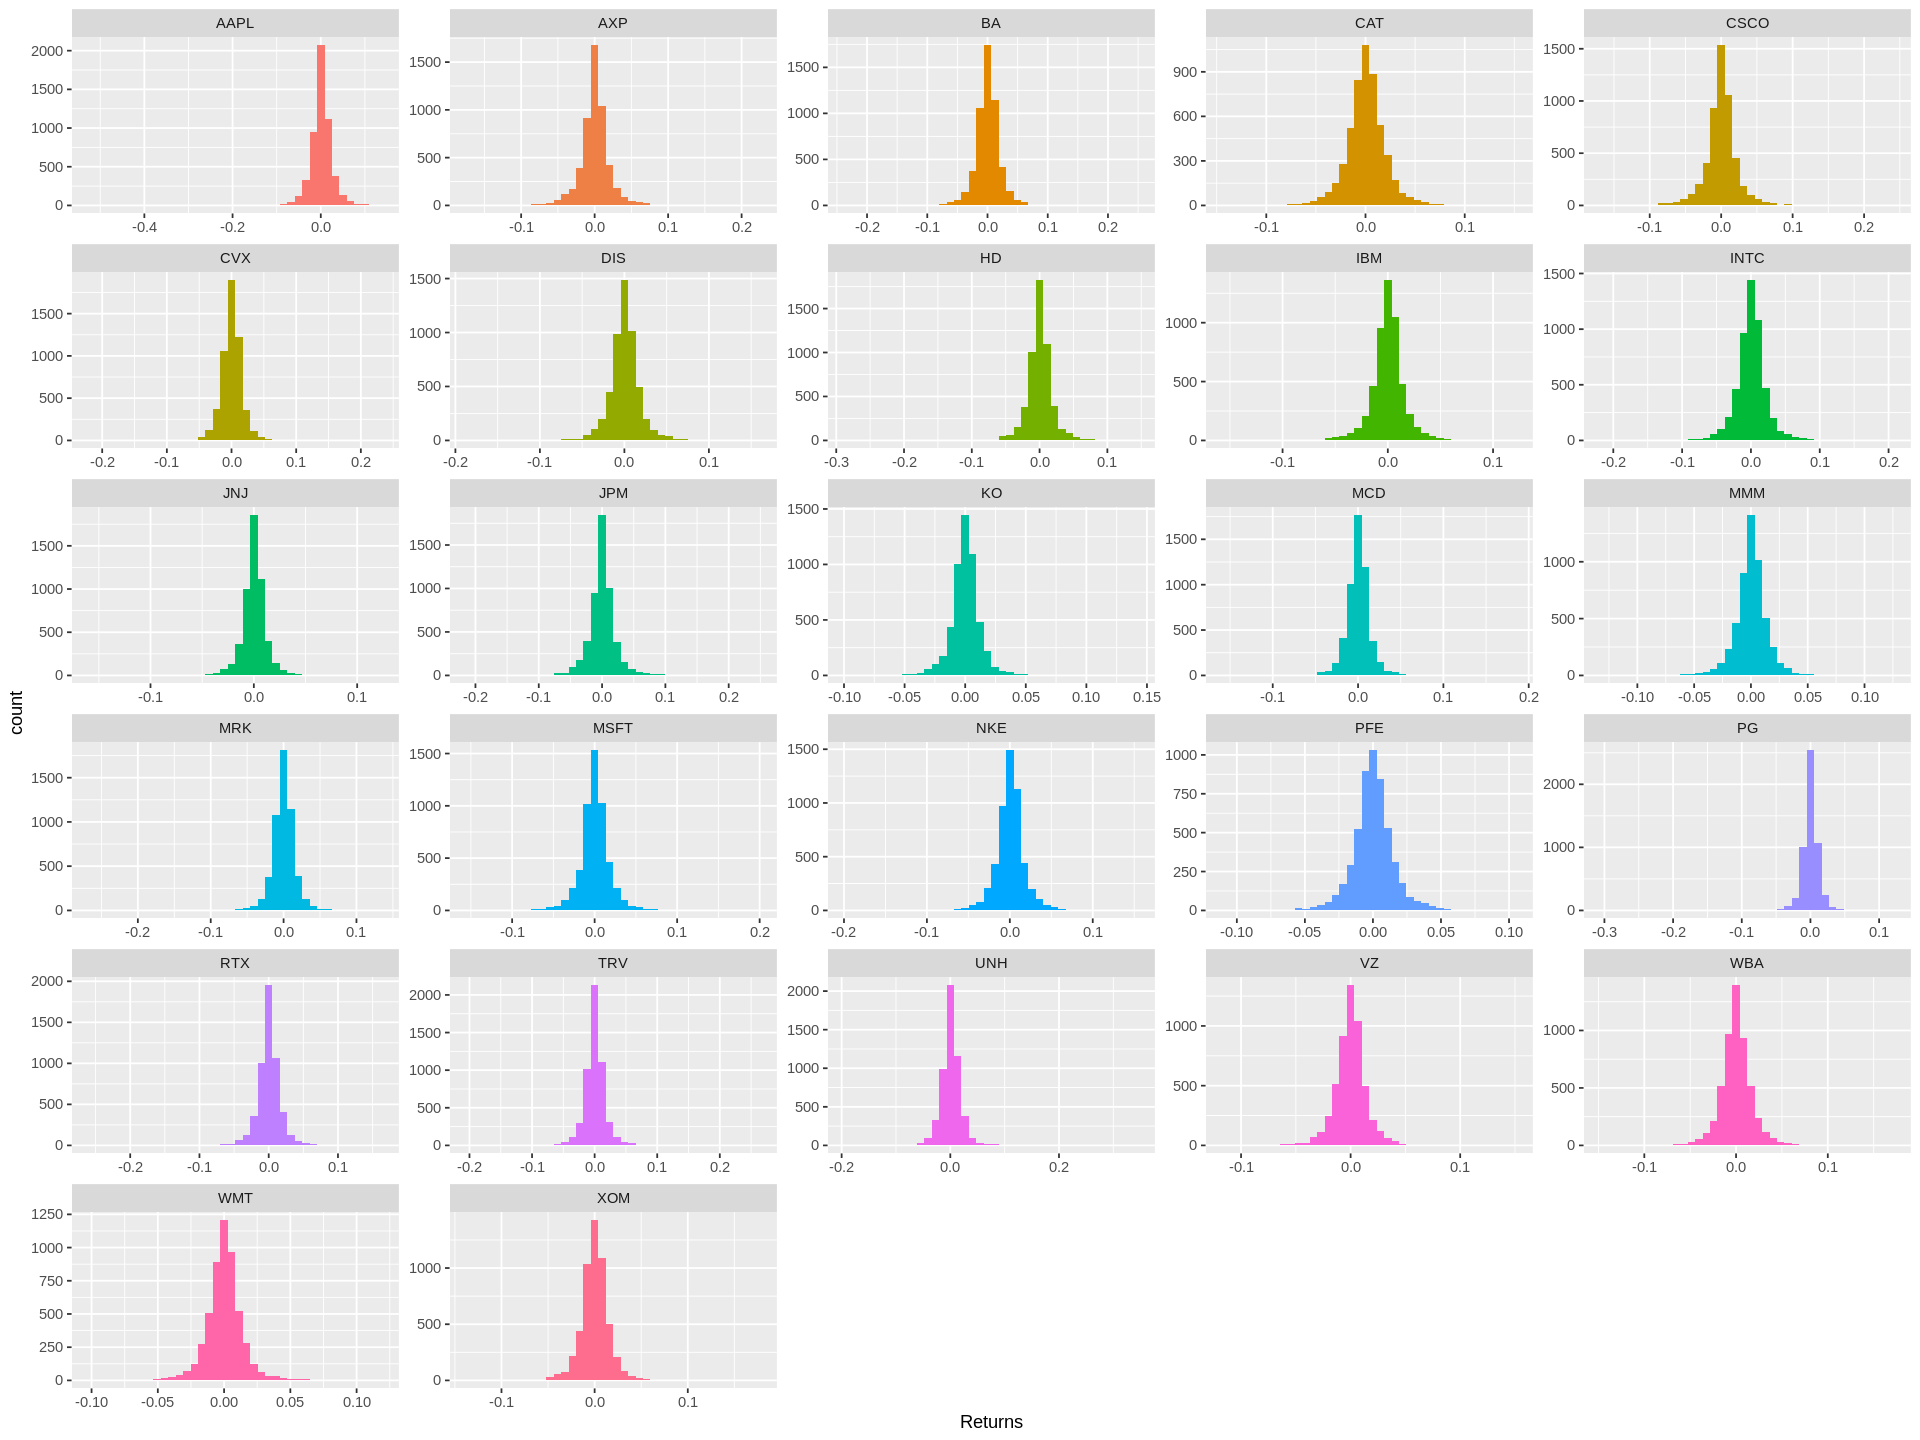

In [12]:
options(repr.plot.width=16, repr.plot.height=12)
p2 <- ggplot(base_ret%>%filter(Index=='down'), aes(x=Returns, fill=Stock) ) +
  geom_histogram(bins = 40) +
  facet_wrap(vars(Stock), ncol=5, scale="free") +
  theme(legend.position = "None")

p2

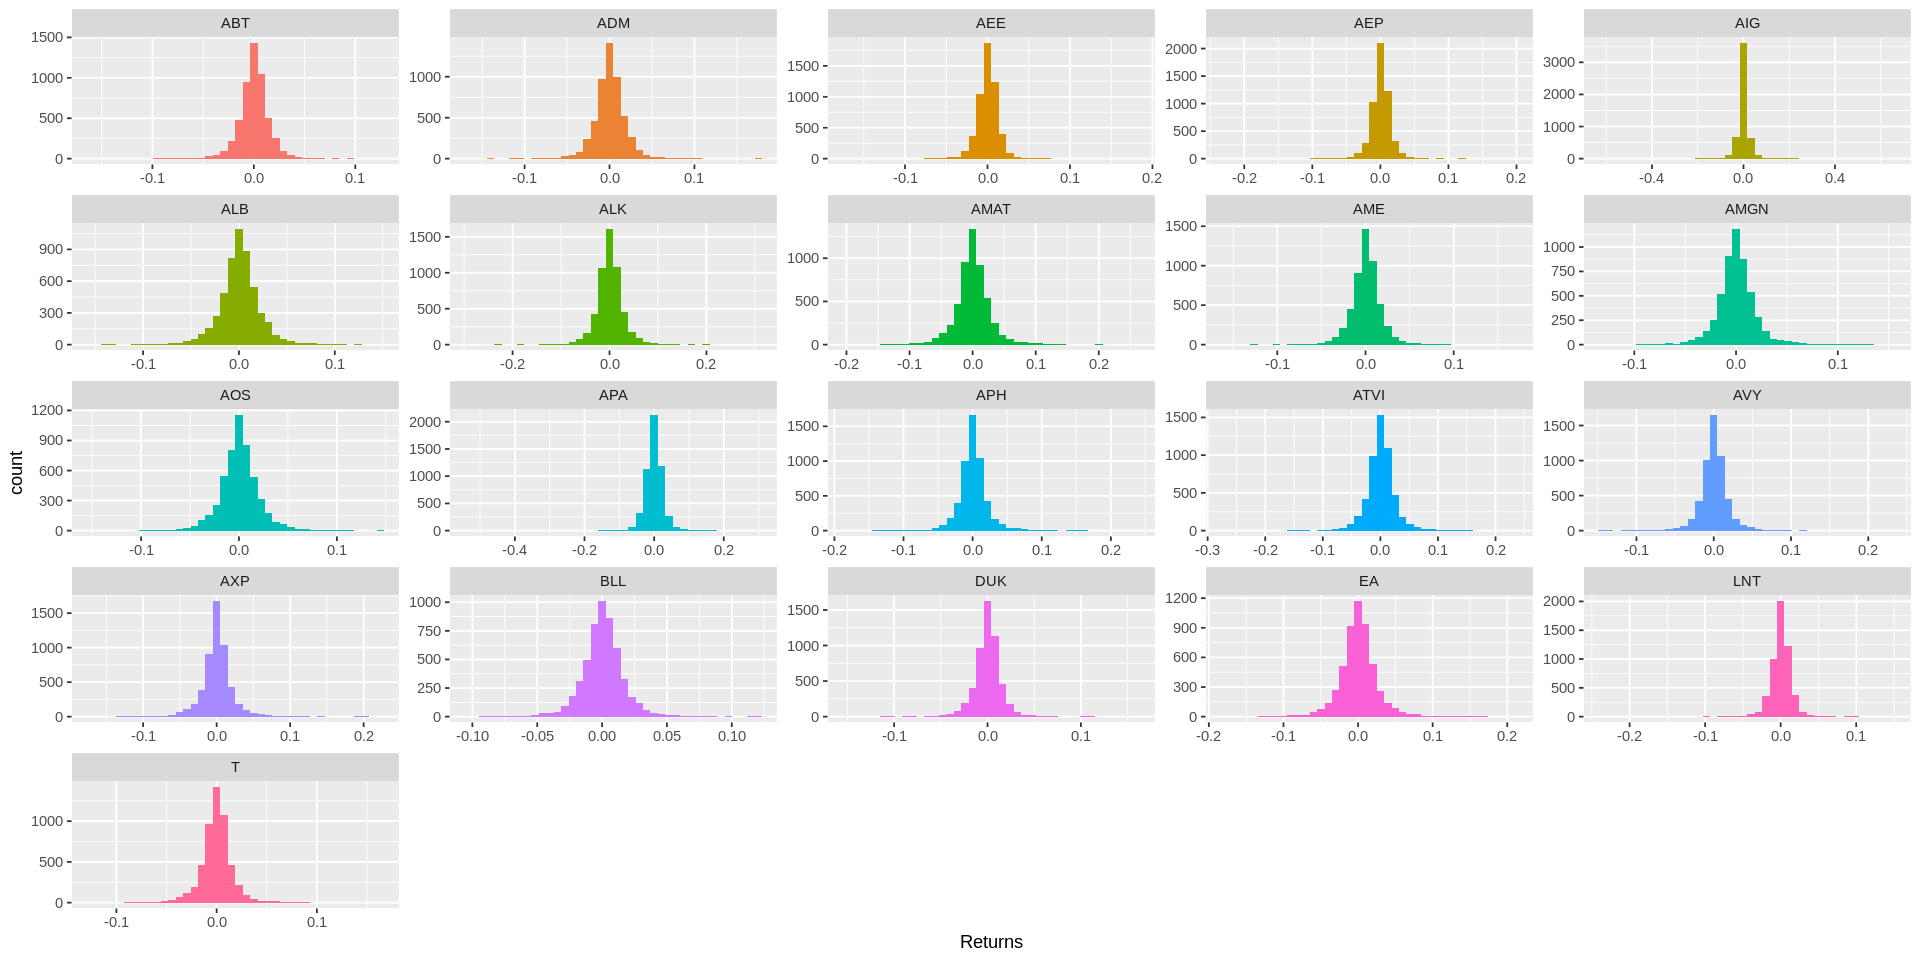

In [13]:
options(repr.plot.width=16, repr.plot.height=8)
p3 <- ggplot(base_ret%>%filter(Index=='sp500'), aes(x=Returns, fill=Stock) ) +
  geom_histogram(bins = 40) +
  facet_wrap(vars(Stock), ncol=5, scale="free") +
  theme(legend.position = "None")

p3

# **Joyplot**

Picking joint bandwidth of 0.00231

Picking joint bandwidth of 0.00195

Picking joint bandwidth of 0.00219

Picking joint bandwidth of 0.00251

Picking joint bandwidth of 0.00113

Picking joint bandwidth of 0.00232

Picking joint bandwidth of 0.00222



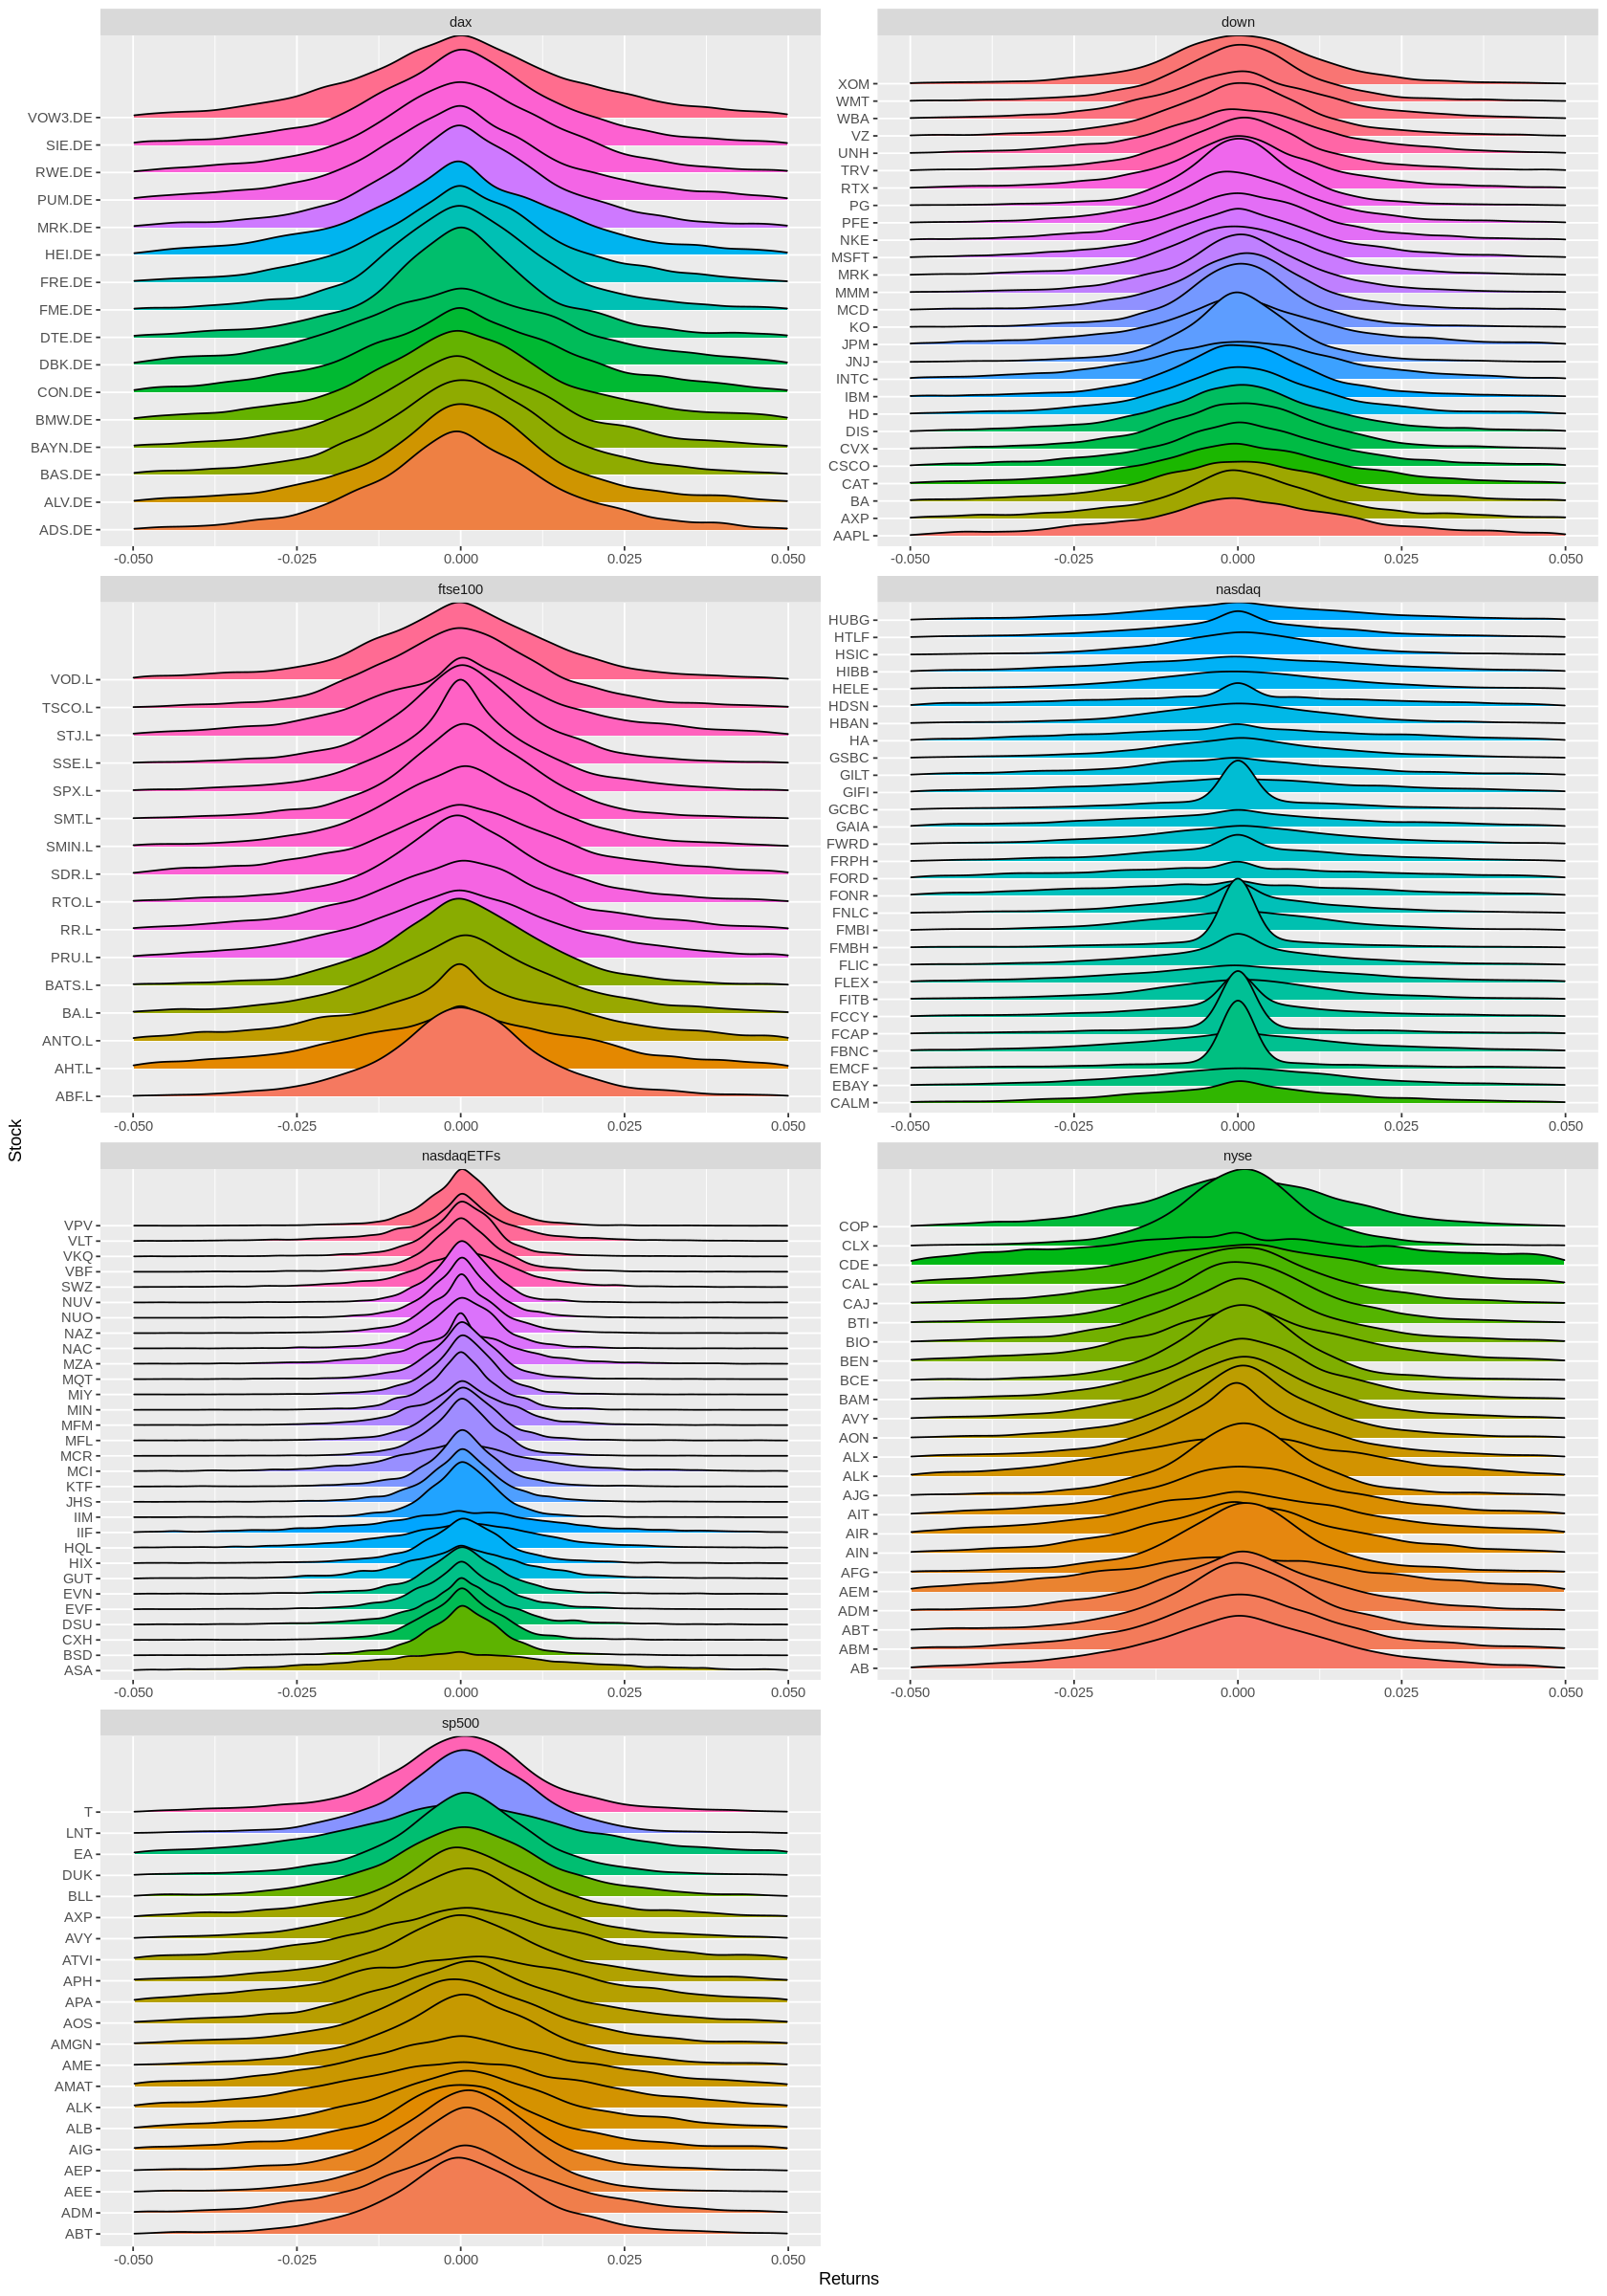

In [36]:
options(repr.plot.width=14, repr.plot.height=20)
p4 <- ggplot(base_ret, aes(x = Returns, y = Stock, fill = Stock)) +
  geom_density_ridges(scale = 4) +
  xlim(-0.05, 0.05) +
  theme(legend.position = "None") +
  facet_wrap(vars(Index), scale="free", ncol=2)
p4

In [38]:
ks.test(base_ret%>%filter(Index=='down', Stock=='WMT')%>%select(Returns)%>%pull(), 'pnorm')$statistic

Warning message in ks.test.default(base_ret %>% filter(Index == "down", Stock == :
“ties should not be present for the Kolmogorov-Smirnov test”


D 
0.4751657

## **Normalidad**

Kolmogorov-Smirnov test:

$H_0$ :	The data follow a specified distribution

$H_a$ :	The data do not follow the specified distribution

In [10]:
norm.test <- base_ret %>% 
  group_by(Stock, Index) %>% 
  summarise(ret = list(Returns)) %>% 
  mutate(statistic = ks.test(unlist(ret), 'pnorm')$statistic,
         p_value = ks.test(unlist(ret), 'pnorm')$p.value) %>%
  ungroup() %>% 
  data.frame() %>% 
  select(-ret) %>%
  arrange((Index))


`summarise()` has grouped output by 'Stock'. You can override using the
`.groups` argument.


In [27]:
norm.test%>%filter(Index=='down')

Stock,Index,statistic,p_value
<chr>,<chr>,<dbl>,<dbl>
AAPL,down,0.4649191,0
AXP,down,0.4646905,0
BA,down,0.4681521,0
CAT,down,0.4687237,0
CSCO,down,0.4621801,0
CVX,down,0.4747917,0
DIS,down,0.4701448,0
HD,down,0.4714074,0
IBM,down,0.4723251,0


In [15]:
cor.md <- function(base){
  # input:
  #   base : returns with date as first column
  # output:
  #   array 3-dimensional (1-2d correlation, 3d time)
  for(i in 2:nrow(base)){
    if(i == 2){
      arr <- cor(base[1:i,-1])
    } else{
      df <- cor(base[1:i,-1])
      arr <- abind(arr, df, along=3)
    }
  }
  dimnames(arr)[[3]] <- as.vector(as.character(base$Date[-1]))
  
  return(arr)
}

In [37]:
ind <- base_ret%>%filter(Index=='sp500')%>%pivot_wider(names_from='Stock', values_from='Returns')%>%select(-Index)
head(down)

Date,WMT,MRK,INTC,MSFT,MMM,AAPL,VZ,JNJ,KO,⋯,NKE,DIS,HD,TRV,RTX,AXP,CVX,JPM,XOM,BA
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-01-04,-0.03741815,-0.035120128,-0.046695402,-0.033780161,-0.03973510,-0.08431001,-0.032325296,-0.036610169,0.001108647,⋯,-0.054545455,0.05857743,-0.05273250,-0.013257576,-0.040999964,-0.037758267,0.000000000,-0.027444228,-0.019154030,-0.00155521
2000-01-05,-0.02040816,0.039271962,0.008289375,0.010543840,0.02896552,0.01463317,0.033405126,0.010555947,0.008859358,⋯,0.057692308,0.04150196,0.02024291,-0.007677543,-0.019812319,-0.026848423,0.017937220,-0.006172866,0.054515867,0.06230530
2000-01-06,0.01091270,0.008295032,-0.058295964,-0.033498078,0.08042895,-0.08653837,-0.011470243,0.031337047,0.001097695,⋯,-0.005194805,-0.03984818,-0.04761905,0.019342360,0.047872348,0.020373457,0.042584435,0.014197011,0.051697531,0.01026393
2000-01-07,0.07556428,0.095978015,0.041269841,0.013068182,0.01985112,0.04736896,-0.007384000,0.042538825,0.065789474,⋯,0.000000000,-0.01581027,0.05833333,0.039848197,0.039593948,0.014559097,0.017605634,0.018372703,-0.002934703,0.02902758
2000-01-10,-0.01824818,-0.029191015,0.045731707,0.007291082,-0.00486618,-0.01758794,-0.005313459,-0.025259067,-0.031893004,⋯,0.016971359,0.15261050,-0.00492126,-0.018248175,0.009765542,0.013940108,-0.026989619,-0.017182104,-0.013980868,-0.01410437
2000-01-11,-0.01486989,0.003436407,0.045918367,-0.025612472,-0.01711491,-0.05115103,-0.009348297,0.003322259,0.034006376,⋯,0.050064103,0.01045286,-0.02571711,-0.011152416,-0.023210805,0.009300444,-0.009246088,-0.023601398,0.002985075,-0.01859800


In [38]:
matcor <- cor.md(ind)

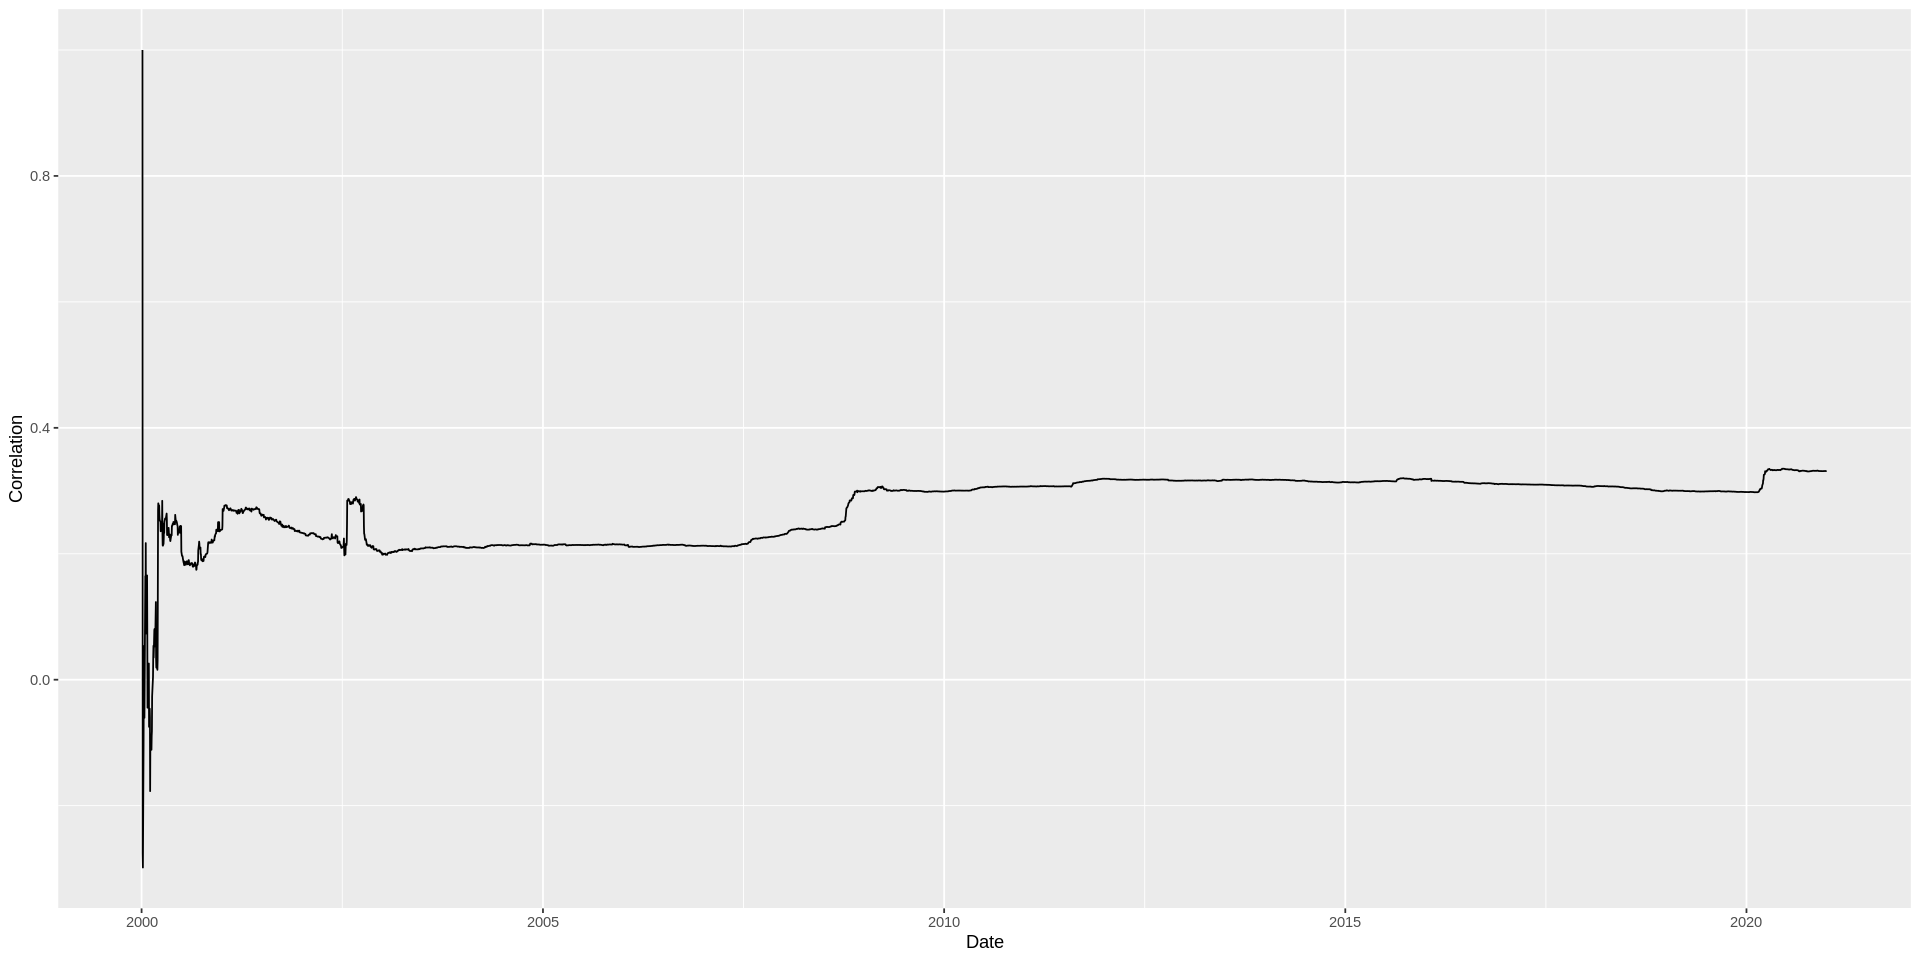

In [41]:
# df
df01 <- data.frame(matcor[1,7,]) %>%mutate('Date'=as.Date(row.names(.)))
colnames(df01) <- c('Correlation', 'Date')
# Gráfico
options(repr.plot.width=16, repr.plot.height=8)
p1 <- ggplot(df01, aes(x=Date, y=Correlation)) +
  geom_line()
p1

# **Hurst exponent**


Interpretación:

- $H < 0.5$ : Si el valor de Hurst es inferior a 0,5, se puede considerar una serie temporal antipersistente
- $H = 0.5$ : Si el valor de Hurst es 0,5, indicaría que se trata de un paseo aleatorio o de un mercado en el que no es posible predecir el futuro basándose en los datos del pasado.
- $H > 0.5$ : Si el valor de Hurst es superior a 0,5, indicaría una serie temporal persistente (se traduce en un mercado con tendencia)

In [51]:
hurstexp(base_ret%>%filter(Index=='down', Stock=='WMT')%>%select(Returns)%>%pull())$He

Simple R/S Hurst estimation:         0.4615608 
Corrected R over S Hurst exponent:   0.465389 
Empirical Hurst exponent:            0.4432629 
Corrected empirical Hurst exponent:  0.4157424 
Theoretical Hurst exponent:          0.5287201 


[1] 0.4432629

In [19]:
husrt.exp <- base_ret %>% 
  group_by(Stock, Index) %>% 
  summarise(ret = list(Returns)) %>% 
  mutate('husrtexp' = round(hurstexp(unlist(ret))$He,2)) %>%
  ungroup() %>% 
  data.frame() %>% 
  select(-ret) %>%
  arrange((Index)) %>%
  select(Index, Stock, husrtexp)

`summarise()` has grouped output by 'Stock'. You can override using the
`.groups` argument.


Simple R/S Hurst estimation:         0.5277079 
Corrected R over S Hurst exponent:   0.5591837 
Empirical Hurst exponent:            0.5587543 
Corrected empirical Hurst exponent:  0.5288796 
Theoretical Hurst exponent:          0.5287201 
Simple R/S Hurst estimation:         0.512232 
Corrected R over S Hurst exponent:   0.531826 
Empirical Hurst exponent:            0.5466781 
Corrected empirical Hurst exponent:  0.5171804 
Theoretical Hurst exponent:          0.5287201 
Simple R/S Hurst estimation:         0.506665 
Corrected R over S Hurst exponent:   0.5146978 
Empirical Hurst exponent:            0.4689078 
Corrected empirical Hurst exponent:  0.4415131 
Theoretical Hurst exponent:          0.5287201 
Simple R/S Hurst estimation:         0.468198 
Corrected R over S Hurst exponent:   0.4870902 
Empirical Hurst exponent:            0.4963698 
Corrected empirical Hurst exponent:  0.4656577 
Theoretical Hurst exponent:          0.5287201 
Simple R/S Hurst estimation:         0.48809

In [43]:
husrt_table <- husrt.exp %>% 
  mutate('class'=ifelse(husrtexp < 0.50, '<0.50', ifelse(husrtexp > 0.50, '>0.50', '=0.50'))) %>% 
  group_by(Index, class) %>% 
  summarize('n'=n())%>%
  pivot_wider(names_from='class', values_from='n')

husrt_table

`summarise()` has grouped output by 'Index'. You can override using the
`.groups` argument.


Index,<0.50,=0.50,>0.50
<chr>,<int>,<int>,<int>
dax,1,4,11
down,16,3,8
ftse100,7,4,5
nasdaq,11,1,17
nasdaqETFs,2,3,25
nyse,10,4,10
sp500,10,NA,11


In [21]:
base.stocks <- base_ret %>% 
    group_by(Index, Stock) %>%
    summarise(#n = n(), 
              mean = mean(Returns), 
              sd = sd(Returns),
              sr = mean / sd, 
              min = min(Returns),
              max = max(Returns),
              skeness = skewness(Returns),
              kurtosis = kurtosis(Returns)) %>%
    ungroup() %>%
    data.frame()
head(base.stocks)

`summarise()` has grouped output by 'Index'. You can override using the
`.groups` argument.


,Index,Stock,mean,sd,sr,min,max,skeness,kurtosis
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,dax,ADS.DE,0.0007096084,0.01928155,0.036802464,-0.1537037,0.1365902,0.1614439,9.551690
2,dax,ALV.DE,0.0001548282,0.02202962,0.007028183,-0.1532771,0.2624481,0.5479442,14.933056
3,dax,BAS.DE,0.0003467648,0.01855458,0.018688905,-0.1364531,0.1929230,0.3171441,10.447918
4,dax,BAYN.DE,0.0002166669,0.02057170,0.010532282,-0.1764057,0.3910506,1.1146814,32.403446
5,dax,BMW.DE,0.0003896866,0.02101854,0.018540136,-0.1318505,0.1483843,0.1827266,7.964684
6,dax,CON.DE,0.0006589390,0.02498979,0.026368329,-0.2035758,0.3950191,1.1427330,24.242438


In [22]:
base_stat <- left_join(base.stocks, husrt.exp,  by=c('Index', 'Stock')) %>% 
  mutate('class'=ifelse(husrtexp < 0.50, '<0.50', ifelse(husrtexp > 0.50, '>0.50', '=0.50')))
head(base_stat)

,Index,Stock,mean,sd,sr,min,max,skeness,kurtosis,husrtexp,class
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,dax,ADS.DE,0.0007096084,0.01928155,0.036802464,-0.1537037,0.1365902,0.1614439,9.551690,0.48,<0.50
2,dax,ALV.DE,0.0001548282,0.02202962,0.007028183,-0.1532771,0.2624481,0.5479442,14.933056,0.53,>0.50
3,dax,BAS.DE,0.0003467648,0.01855458,0.018688905,-0.1364531,0.1929230,0.3171441,10.447918,0.50,=0.50
4,dax,BAYN.DE,0.0002166669,0.02057170,0.010532282,-0.1764057,0.3910506,1.1146814,32.403446,0.53,>0.50
5,dax,BMW.DE,0.0003896866,0.02101854,0.018540136,-0.1318505,0.1483843,0.1827266,7.964684,0.52,>0.50
6,dax,CON.DE,0.0006589390,0.02498979,0.026368329,-0.2035758,0.3950191,1.1427330,24.242438,0.61,>0.50


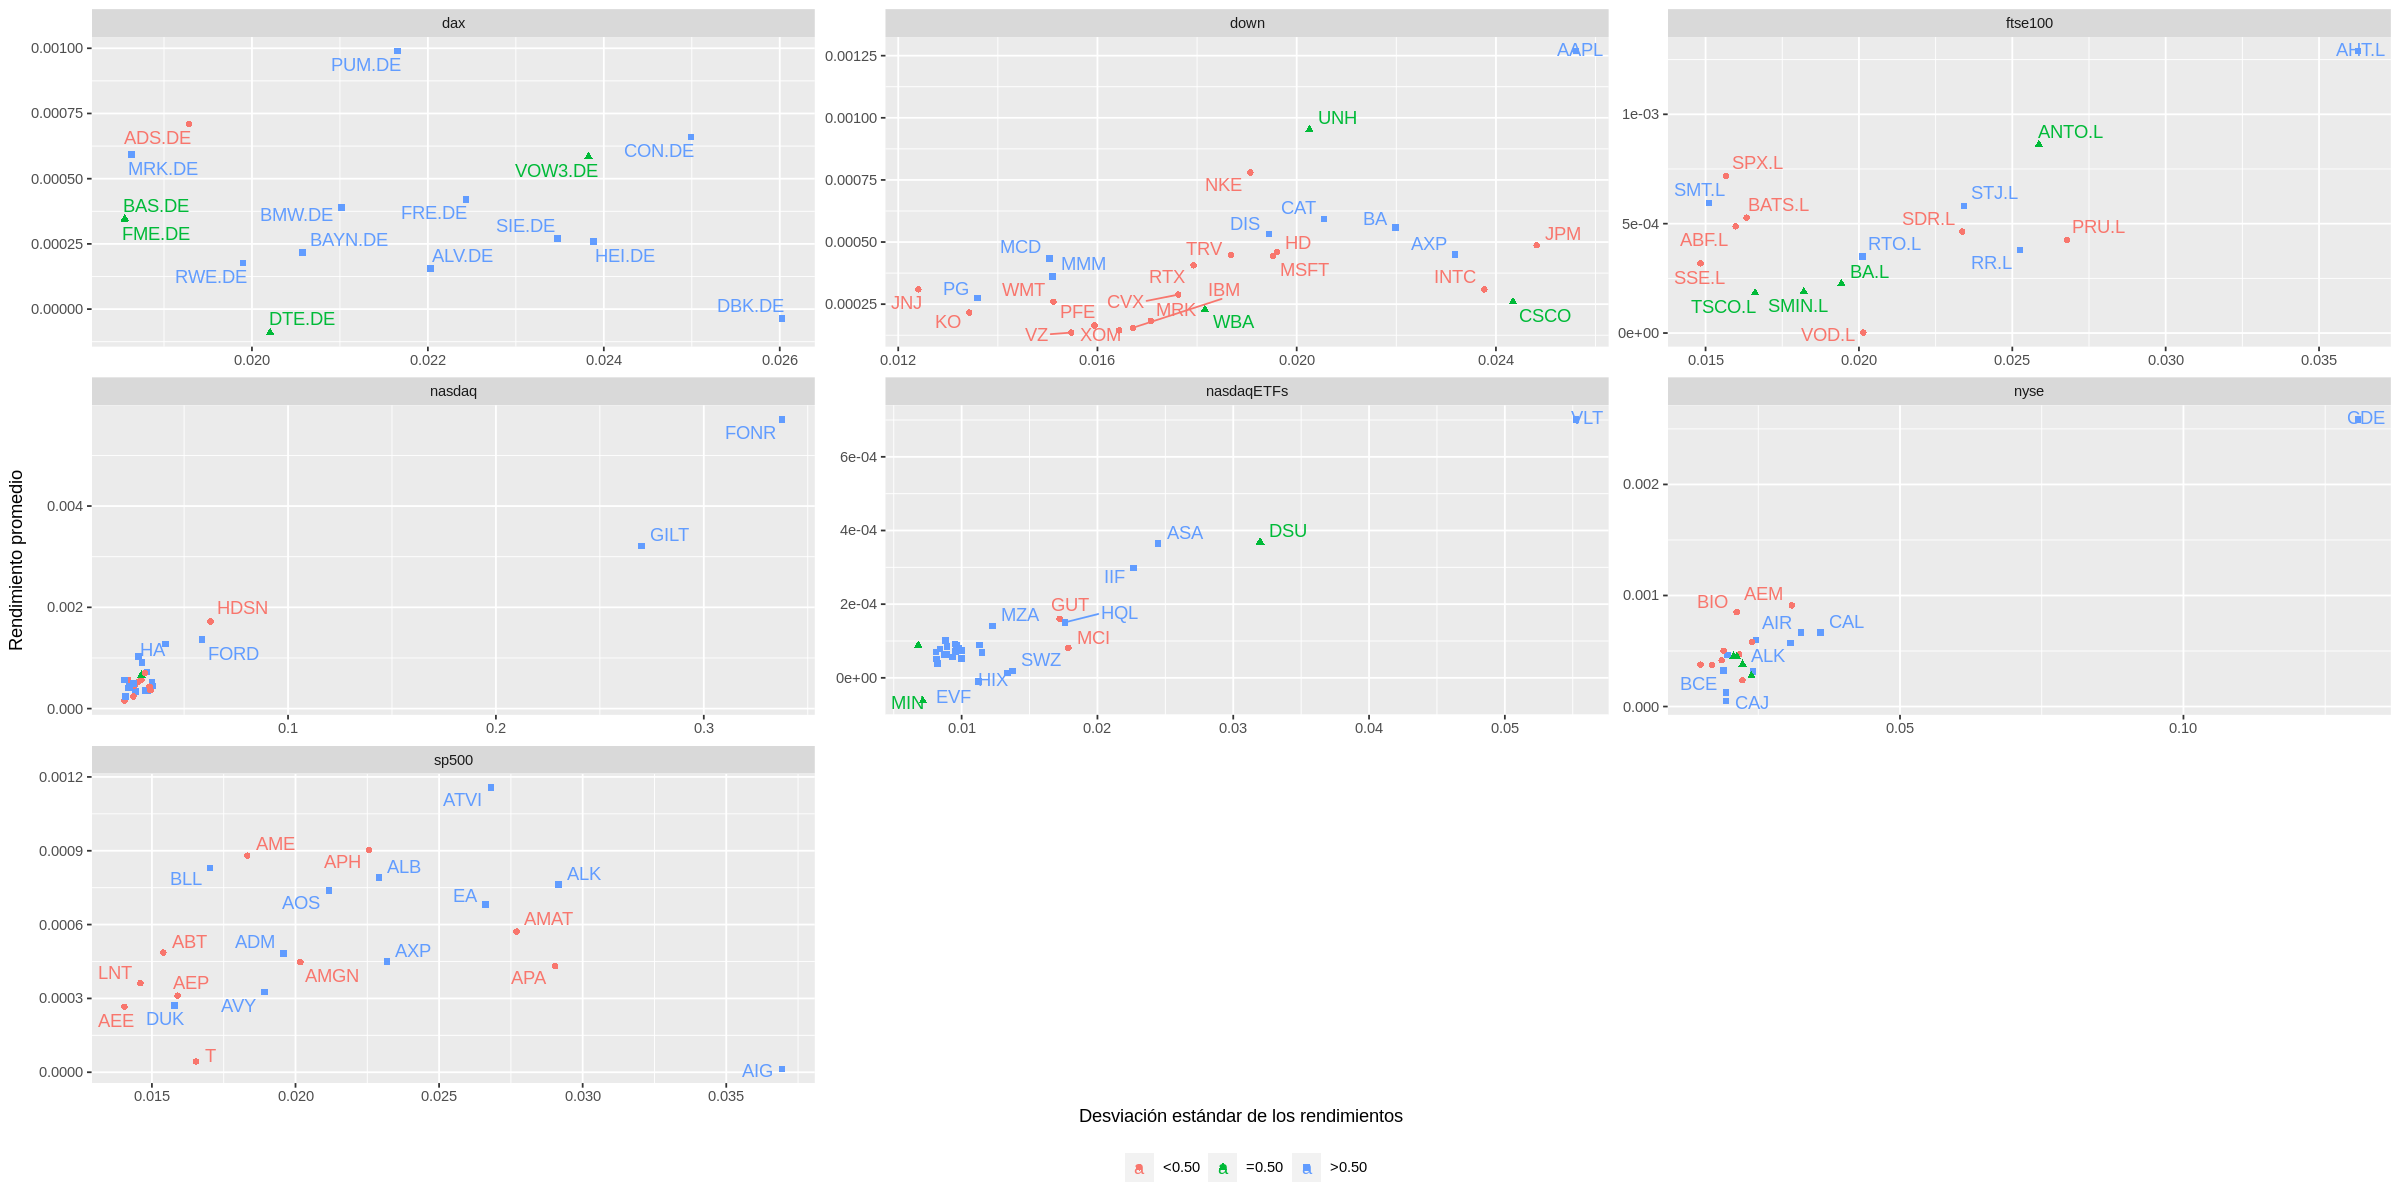

In [23]:
options(repr.plot.width=20, repr.plot.height=10)
p0 <- ggplot(base_stat, aes(x=sd, y=mean, color=class, shape=class)) +
    geom_point() +
    xlab('Desviación estándar de los rendimientos') +
    ylab('Rendimiento promedio') +
    facet_wrap(vars(Index), scale="free") +
    geom_text_repel(aes(label=Stock)) +
    #theme_light() +
    #theme_cyberpunk()+
    #scale_fill_cyberpunk("zune")+
    #scale_color_cyberpunk("zune")+
    #theme_minimal() +
    theme(#legend.position="none",
          legend.direction='horizontal',
          legend.position="bottom",
          legend.box = "horizontal",
          legend.title = element_blank())
p0